In [1]:
import ROOT

import math
from ROOT import RooRealVar, RooDataHist, RooArgList, RooArgSet, RooFit, RooGaussian, RooPolynomial,RooDataSet,RooAddPdf,RooFormulaVar, RooProdPdf

Welcome to JupyROOT 6.22/06


# Using a 1d projection

In [2]:
#filename="MC_RGA_3313_2.root"
filename="MC_RGA_3051_0.root"

In [ ]:
file = ROOT.TFile(filename)
tree = file.Get("dihadron")

# Define the RooRealVar for M1
M1 = RooRealVar("M1", "M1", 0.1, 0.3)

# Define the RooRealVar for p_11 and p_12
p_11 = RooRealVar("p_11", "p_11", 0, 10)
p_12 = RooRealVar("p_12", "p_12", 0, 10)

# Define the RooFormulaVar for the cut
cut_formula = "p_11 > 0.9 && p_12 > 0.9"
cut = RooFormulaVar("cut", cut_formula, RooArgList(p_11, p_12))

# Create a RooDataSet with the M1 values from the TTree using the given cut
data = RooDataSet("data", "data", tree, RooArgSet(M1,p_11,p_12), cut_formula)

# Create a histogram with the M1 values from the RooDataSet
hist = RooDataHist("hist", "hist", RooArgList(M1), data)

# Define the Gaussian and polynomial PDFs
mean = RooRealVar("mean", "mean", 0.135, 0.1, 0.3)
sigma = RooRealVar("sigma", "sigma", 0.01, 0.0, 0.1)
gaussian = RooGaussian("gaussian", "gaussian", M1, mean, sigma)
a0 = RooRealVar("a0", "a0", 1.0, -10.0, 10.0)
a1 = RooRealVar("a1", "a1", 1.0, -10.0, 10.0)
a2 = RooRealVar("a2", "a2", 1.0, -10.0, 10.0)
polynomial = RooPolynomial("polynomial", "polynomial", M1, RooArgList(a0, a1, a2), 2)

# Define the coefficients for the RooAddPdf
gauss_frac = RooRealVar("gauss_frac", "gauss_frac", 0.5, 0, 1)

pdf = RooAddPdf("pdf", "pdf", RooArgList(gaussian, polynomial), RooArgList(gauss_frac))

# Perform the maximum likelihood fit
result = pdf.fitTo(data)

# Print the fit results
#result.Print()

# Plot the data and the fitted PDF
canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
frame = M1.frame()
hist.plotOn(frame)
pdf.plotOn(frame)
frame.Draw()
canvas.Draw()

# Using a standard TF2

In [12]:
import ROOT
import math
filename="inject.root"

In [13]:
file = ROOT.TFile(filename)
tree = file.Get("dihadron")
nbins=20

In [14]:
# Define the ranges for the integrals
x_min, x_max = 0.1, 0.2
y_min, y_max = 0.1, 0.2
h2 = ROOT.TH2F("h2","h2;M1;M2",nbins,x_min,x_max,nbins,x_min,x_max)
tree.Draw("M2:M1>>h2","p_11 > 0.9 && p_12 > 0.9 && p_21>0.9 && p_22>0.9","goff")
#tree.Draw("M2:M1>>h2","trueparentpid_1==111&&trueparentpid_2==111","goff")
h2.Scale(1/h2.Integral())

p0 = 0.0084 +/- 0.0000
p1 = 0.1355 +/- 0.0000
p2 = 0.0122 +/- 0.0001
p3 = 0.1381 +/- 0.0001
p4 = 0.0230 +/- 0.0001
p5 = -0.0002 +/- 0.0001
p6 = 0.0111 +/- 0.0007
p7 = 0.0067 +/- 0.0007
p8 = -0.0625 +/- 0.0043
Chi-square / ndf = 4943.5894 / 391 = 12.6435


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 


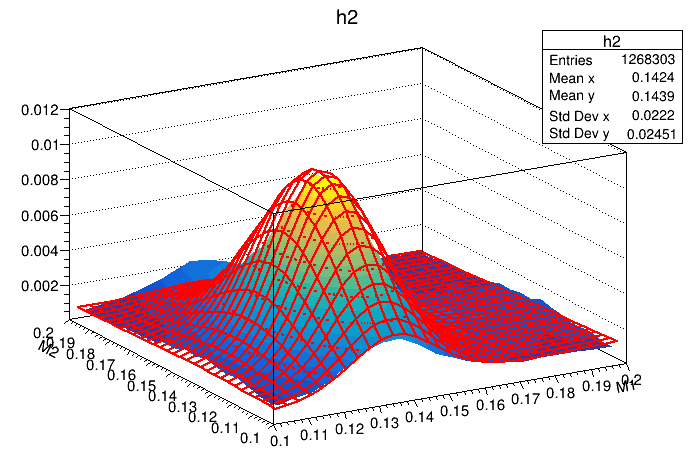

In [15]:
f2 = ROOT.TF2("f2","[0]*TMath::Gaus(x,[1],[2])*TMath::Gaus(y,[3],[4])+[5]+[6]*x+[7]*y+[8]*x*y",x_min,x_max,y_min,y_max);
f2.SetParLimits(1,0.125,0.14)
f2.SetParLimits(2,0.001,0.03)
f2.SetParLimits(3,0.125,0.14)
f2.SetParLimits(4,0.001,0.03)
h2.Fit(f2,"Q0NRS")
c=ROOT.TCanvas()
h2.Draw("SURF2")
f2.Draw("SURF same")
c.Draw()

# Set the desired number of significant figures
n_sig_fig = 4

# Loop over the parameters and print their values and errors
for i in range(f2.GetNpar()):
    par_name = f2.GetParName(i)
    par_val = f2.GetParameter(i)
    par_err = f2.GetParError(i)
    sig_fig = n_sig_fig - int(math.floor(math.log10(abs(par_err)))) if par_err != 0 else n_sig_fig
    print("{0} = {1:.{3}f} +/- {2:.{3}f}".format(par_name, par_val, round(par_err, sig_fig), n_sig_fig))
    
# Calculate the chi-square and ndf
chi2 = f2.GetChisquare()
ndf = f2.GetNDF()

# Print the chi-square and ndf
print("Chi-square / ndf = {0:.{1}f} / {2} = {3:.{1}f}".format(chi2, n_sig_fig, ndf,chi2/ndf))

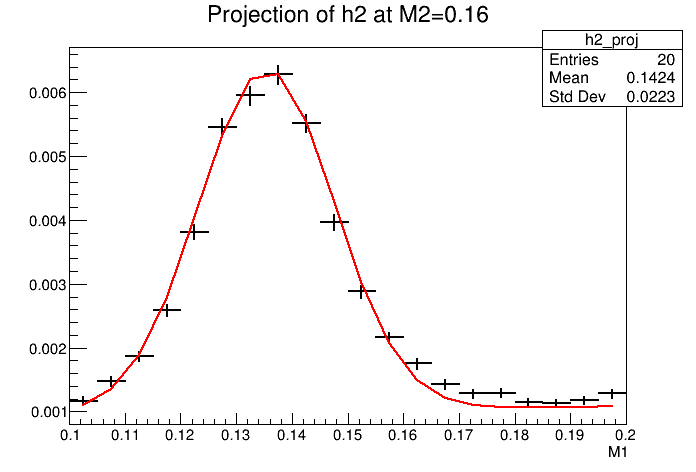

In [16]:
# Define the flag to determine projection direction
proj_dir = "M2"  # set to "M1" or "M2"

# Choose a value to project at
proj_value = 0.16

# Create a TH1 object for the projection
f2_proj = ROOT.TH1F("f2_proj", "Projection of f2 at {}={:.2f};{}".format(proj_dir, proj_value, "M1" if proj_dir=="M2" else "M2"), nbins, x_min, x_max)
h2_proj = ROOT.TH1F("h2_proj", "Projection of h2 at {}={:.2f};{}".format(proj_dir, proj_value, "M1" if proj_dir=="M2" else "M2"), nbins, x_min, x_max)

# Loop over the x- or y-bins and fill the projection histogram with the values of the fitted function at the chosen value
for i in range(1, nbins+1):
    if proj_dir == "M2":
        x = h2.GetXaxis().GetBinCenter(i)
        y = proj_value
    elif proj_dir == "M1":
        x = proj_value
        y = h2.GetYaxis().GetBinCenter(i)
        
    f2_val = f2.Eval(x, y)
    f2_proj.SetBinContent(i, f2_val)
    
    h2_val = h2.GetBinContent(h2.FindBin(x, y))
    h2_proj.SetBinContent(i, h2_val)
    h2_proj.SetBinError(i, h2.GetBinError(h2.FindBin(x, y)))
    
# Draw the histogram and fitted function projections
c_proj = ROOT.TCanvas()
h2_proj.Draw()
h2_proj.SetLineColor(ROOT.kBlack)
h2_proj.SetLineWidth(2)
f2_proj.Draw("l SAME")
f2_proj.SetLineColor(ROOT.kRed)
f2_proj.SetLineWidth(2)
c_proj.Draw()

In [17]:
# Calculate the volume taken up by only the two Gaussians
x_mean1, x_sigma1 = f2.GetParameter(1), f2.GetParameter(2)
y_mean1, y_sigma1 = f2.GetParameter(3), f2.GetParameter(4)
x_mean2, x_sigma2 = f2.GetParameter(1), f2.GetParameter(2)
y_mean2, y_sigma2 = f2.GetParameter(3), f2.GetParameter(4)

# Define a new TF2 for the Gaussian-only component
f_gauss = ROOT.TF2("f_gauss", "[0]*TMath::Gaus(x,[1],[2])*TMath::Gaus(y,[3],[4])", x_min, x_max, y_min, y_max)
f_gauss.SetParameter(0, f2.GetParameter(0))
f_gauss.SetParameter(1, f2.GetParameter(1))
f_gauss.SetParameter(2, f2.GetParameter(2))
f_gauss.SetParameter(3, f2.GetParameter(3))
f_gauss.SetParameter(4, f2.GetParameter(4))

# Calculate the volume taken up by only the two Gaussians in f2
vol_gauss_f2 = f2.Integral(x_mean1-2*x_sigma1, x_mean1+2*x_sigma1, y_mean1-2*y_sigma1, y_mean1+2*y_sigma1) + \
               f2.Integral(x_mean2-2*x_sigma2, x_mean2+2*x_sigma2, y_mean2-2*y_sigma2, y_mean2+2*y_sigma2)

# Calculate the volume taken up by the Gaussian-only TF2
vol_gauss = f_gauss.Integral(x_min, x_max, y_min, y_max)

# Print the results
print("Volume taken up by only the two Gaussians in f2: {:.9f}".format(vol_gauss_f2))
print("Volume taken up by the Gaussian-only TF2: {:.9f}".format(vol_gauss))
print("Ratio = ",vol_gauss_f2/vol_gauss)

Volume taken up by only the two Gaussians in f2: 0.000036392
Volume taken up by the Gaussian-only TF2: 0.000014057
Ratio =  2.588917701748219


# Using 2D RooFit

In [ ]:
import ROOT
from ROOT import RooRealVar, RooDataHist, RooArgList, RooArgSet, RooFit, RooGaussian, RooPolynomial,RooDataSet,RooAddPdf,RooFormulaVar, RooProdPdf
#file = ROOT.TFile("MC_RGA_3317_0.root")
filename="MC_RGA_3051_0.root"
file = ROOT.TFile(filename)
tree = file.Get("dihadron")

# Define the RooRealVars for M1 and M2
M1 = RooRealVar("M1", "M1", 0.05, 0.3)
M2 = RooRealVar("M2", "M2", 0.05, 0.3)

# Define the RooRealVars for p_11 and p_12
p_11 = RooRealVar("p_11", "p_11", 0, 10)
p_12 = RooRealVar("p_12", "p_12", 0, 10)
p_21 = RooRealVar("p_21", "p_21", 0, 10)
p_22 = RooRealVar("p_22", "p_22", 0, 10)

# Define the RooFormulaVar for the cut
cut_formula = "p_11 > 0.9 && p_12 > 0.9 && p_21>0.9 && p_22>0.9"
cut = RooFormulaVar("cut", cut_formula, RooArgList(p_11, p_12, p_21, p_22))

# Create a RooDataSet with the M1 and M2 values from the TTree using the given cut
data = RooDataSet("data", "data", tree, RooArgSet(M1, M2, p_11, p_12, p_21, p_22), cut_formula)

# Create a 2D histogram with the M1 and M2 values from the RooDataSet
hist = RooDataHist("hist", "hist", RooArgList(M1, M2), data)

# Define the 2D Gaussian and 2D polynomial PDFs
mean_1 = RooRealVar("mean_1", "mean_1", 0.135, 0.125, 0.14)
mean_2 = RooRealVar("mean_2", "mean_2", 0.135, 0.125, 0.14)
sigma_1 = RooRealVar("sigma_1", "sigma_1", 0.005, 0.001, 0.03)
sigma_2 = RooRealVar("sigma_2", "sigma_2", 0.005, 0.001, 0.03)
rho = RooRealVar("rho", "rho", 0.0, -1.0, 1.0)
gaussx = RooGaussian("gaussx","gaussx",M1,mean_1,sigma_1)
gaussy = RooGaussian("gaussy","gaussy",M2,mean_2,sigma_2)
gaussian = RooProdPdf("gaussian","gaussx*gaussy",RooArgList(gaussx,gaussy))
a00 = RooRealVar("a00", "a00", 1.0, -1.0, 1.0)
a10 = RooRealVar("a10", "a10", 1.0, -1.0, 1.0)
a01 = RooRealVar("a01", "a01", 1.0, -1.0, 1.0)
a20 = RooRealVar("a20", "a20", 1.0, -1.0, 1.0)
a11 = RooRealVar("a11", "a11", 1.0, -1.0, 1.0)
a02 = RooRealVar("a02", "a02", 1.0, -1.0, 1.0)
# Define Chebyshev polynomials
poly1 = RooPolynomial("poly1", "poly1", M1, RooArgList(a00, a10, a01))
poly2 = RooPolynomial("poly2", "poly2", M2, RooArgList(a20, a11, a02))

# Define product PDF
poly_prod = RooProdPdf("poly_prod", "poly1*poly2", RooArgList(poly1, poly2))

# Define the coefficients for the RooAddPdf
gauss_frac = RooRealVar("gauss_frac", "gauss_frac", 0.5, 0, 1)

pdf = RooAddPdf("pdf", "pdf", RooArgList(gaussian, poly_prod), RooArgList(gauss_frac))

# Perform the maximum likelihood fit
result = pdf.fitTo(data,RooFit.Save(), 
                   RooFit.Minimizer("Minuit2", "Migrad"),
                   RooFit.Strategy(2))

# Print the fit results
result.Print()

# # Plot the data and the fitted PDF

# frame.Draw()
# canvas.Draw()

Welcome to JupyROOT 6.22/06


In [2]:
result.Print()


  RooFitResult: minimized FCN value: -6134.64, estimated distance to minimum: 0.000284821
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                   a00    9.9996e-01 +/-  2.77e-01
                   a01   -9.9949e-01 +/-  1.95e+00
                   a02   -1.0000e+00 +/-  1.44e-01
                   a10   -4.7764e-01 +/-  1.74e+00
                   a11   -1.0000e+00 +/-  4.36e-02
                   a20   -1.0000e+00 +/-  1.49e-02
            gauss_frac    4.3851e-01 +/-  2.10e-02
                mean_1    1.3379e-01 +/-  1.22e-03
                mean_2    1.3597e-01 +/-  1.48e-03
               sigma_1    2.5092e-02 +/-  1.62e-03
               sigma_2    3.0000e-02 +/-  1.07e-04



[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on M2 integrates over variables (M1)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


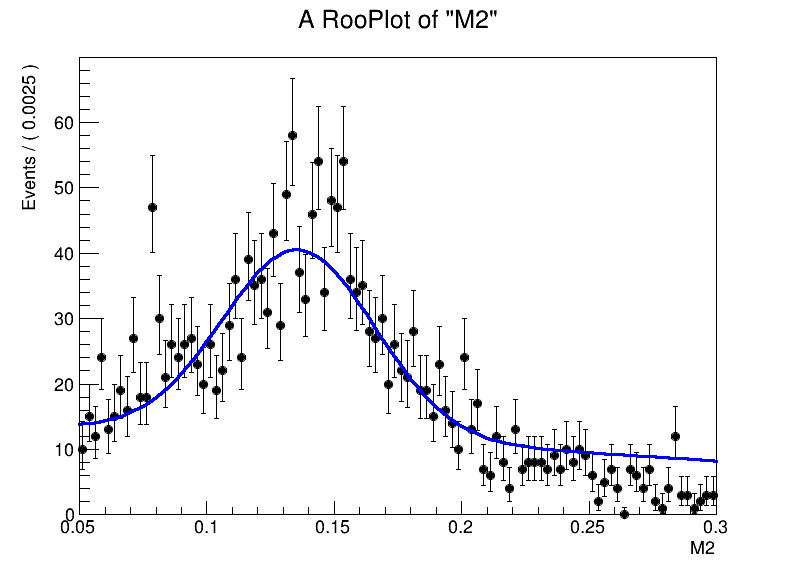

In [4]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
frame = M2.frame()
hist.plotOn(frame)
pdf.plotOn(frame)
frame.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: hist2D__M1_M2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pdf__M1_M2 (Potential memory leak).


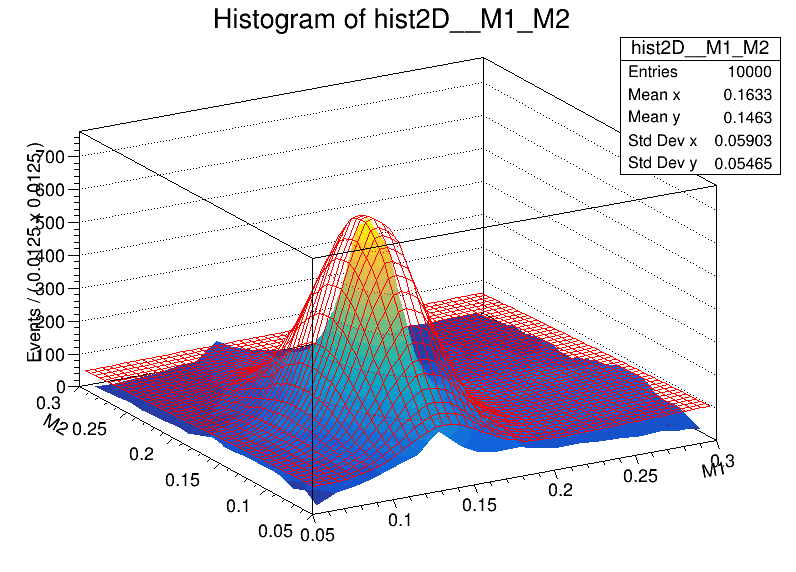

In [6]:
from ROOT import TCanvas, TH2D, TGraph2D, TColor
import array
import numpy as np

# Create a canvas
canvas = TCanvas("canvas", "canvas", 800, 600)

nbins=20
# Create a 2D histogram with bars for bin contents
hist2D = hist.createHistogram("hist2D", M1, RooFit.Binning(nbins), RooFit.YVar(M2, RooFit.Binning(nbins)))

# Set the rainbow color palette
ROOT.gStyle.SetPalette(ROOT.kBird)

# Create a 2D surface fit function
func = pdf.createHistogram("M1,M2", nbins, nbins)

# Create a graph of the fit function
graph = TGraph2D(func)
# Set the color palette for the graph
graph.SetNpx(50)
graph.SetNpy(50)
graph.SetMarkerSize(1.2)
graph.SetMinimum(0)
graph.SetLineColor(2)
# Draw the histogram and the fit function
hist2D.Draw("SURF2")
graph.Draw("surf same")

# Draw the canvas
canvas.Draw()